Klasifikasi Tingkat Kecemasan Para Siswa Menggunakan Metode KNN

# Import Libraries

In [ ]:
# EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import std
from numpy import mean

# Data Modelling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from matplotlib import pyplot

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

df = pd.read_csv('/content/gdrive/My Drive/dataset/Social_Anxiety_Survey_Master.csv')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
#df = pd.read_csv('/content/Social_Anxiety_Survey_Master.csv')

In [ ]:
df.head()

,Timestamp,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7
0,12/12/2019 2:06,Female,Yes,21 - 30,Single,Less than 4 hours per day,3,3,3,3,4,1
1,12/12/2019 21:41,Male,Yes,21 - 30,Single,Less than 2 hours per day,3,3,2,2,4,4
2,12/12/2019 21:42,Female,Yes,21 - 30,Single,4 hours and above per day,1,5,2,4,5,4
3,12/12/2019 21:43,Female,Yes,21 - 30,Single,Less than 1 hours per day,4,4,3,3,3,1
4,12/12/2019 21:43,Male,Yes,21 - 30,Single,Less than 1 hours per day,3,5,2,3,4,4


# Cek Data

In [ ]:
display(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Timestamp  66 non-null     object
 1   Gender     66 non-null     object
 2   Student    66 non-null     object
 3   Age        66 non-null     object
 4   Marital    66 non-null     object
 5   Q1         66 non-null     object
 6   Q2         66 non-null     int64 
 7   Q3         66 non-null     int64 
 8   Q4         66 non-null     int64 
 9   Q5         66 non-null     int64 
 10  Q6         66 non-null     int64 
 11  Q7         66 non-null     int64 
dtypes: int64(6), object(6)
memory usage: 6.3+ KB


None

(66, 12)


# Identifikasi Masalah

## Tujuan 

Tujuan dari penelitian ini adalah memprediksi tingkat kecemasan dari murid.





## Metode Analitik

Metode Analitik yang dipakai adalah Analisis prediktif yaitu cabang dari analisis lanjutan yang digunakan untuk membuat prediksi mengenai kejadian akan terjadi atau prediksi akan sesuatu.

# Data Understanding

In [ ]:
df

,Timestamp,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7
0,12/12/2019 2:06,Female,Yes,21 - 30,Single,Less than 4 hours per day,3,3,3,3,4,1
1,12/12/2019 21:41,Male,Yes,21 - 30,Single,Less than 2 hours per day,3,3,2,2,4,4
2,12/12/2019 21:42,Female,Yes,21 - 30,Single,4 hours and above per day,1,5,2,4,5,4
3,12/12/2019 21:43,Female,Yes,21 - 30,Single,Less than 1 hours per day,4,4,3,3,3,1
4,12/12/2019 21:43,Male,Yes,21 - 30,Single,Less than 1 hours per day,3,5,2,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
61,12/31/2019 16:11:56,Male,Yes,20 or below,Single,Less than 3 hours per day,4,5,4,5,4,2
62,12/31/2019 16:12:42,Male,Yes,20 or below,Single,Less than 4 hours per day,3,2,5,3,1,4
63,12/31/2019 21:23:06,Female,Yes,21 - 30,Single,4 hours and above per day,1,1,1,4,5,1
64,1/1/2020 15:15,Male,Yes,21 - 30,Single,Less than 3 hours per day,2,4,4,4,4,4


<br>Gender = Jenis kelamin dari murid
<br>Student = Apakah termasuk murid atau tidak
<br>Age = Umur dari murid
<br>Marital = Status dari murid
<br>Q1 = Berapa jam per hari yang Anda habiskan di media sosial?
<br>Q2 = Bagaimana perasaan Anda menjadi pusat perhatian?
<br>Q3 = Bekerja sambil diamati
<br>Q4 = Berbicara tatap muka dengan seseorang yang tidak Anda kenal dengan baik
<br>Q5 = Mengekspresikan ketidaksetujuan atau ketidaksetujuan kepada seseorang yang tidak Anda kenal dengan baik
<br>Q6 = Apakah Anda sangat sadar akan tindakan Anda saat berada di lingkungan sosial karena Anda takut tindakan itu akan menyinggung seseorang atau Anda bisa ditolak?,
<br>Q7 = Apakah Anda merasa cemas atau panik sebelum situasi sosial?



# EDA

## Gender

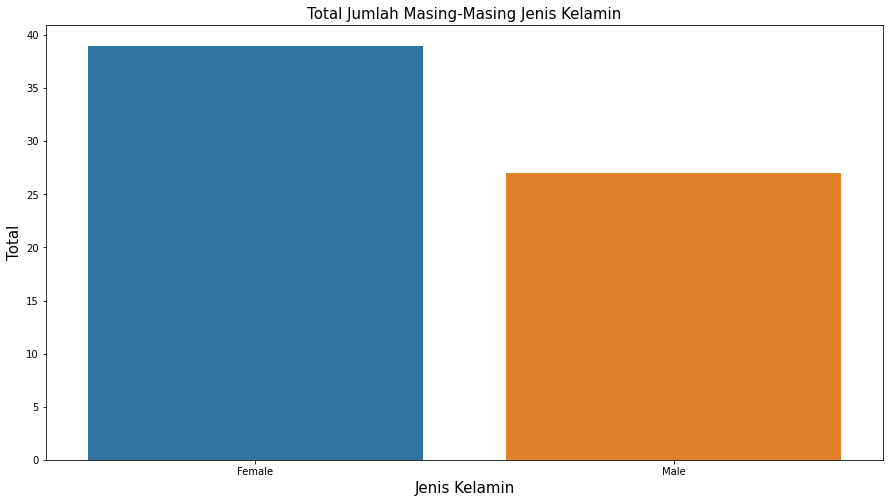

In [ ]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'Gender', data = df);
plt.title('Total Jumlah Masing-Masing Jenis Kelamin', fontdict = {'fontsize':15});
plt.xlabel('Jenis Kelamin',fontdict={'fontsize': 15});
plt.ylabel('Total',fontdict={'fontsize': 15});

Dari visualisasi diatas, dapat dilihat bahwa jenis kelamin perempuan lebih banyak dibandingkan dengan pria.

## Age

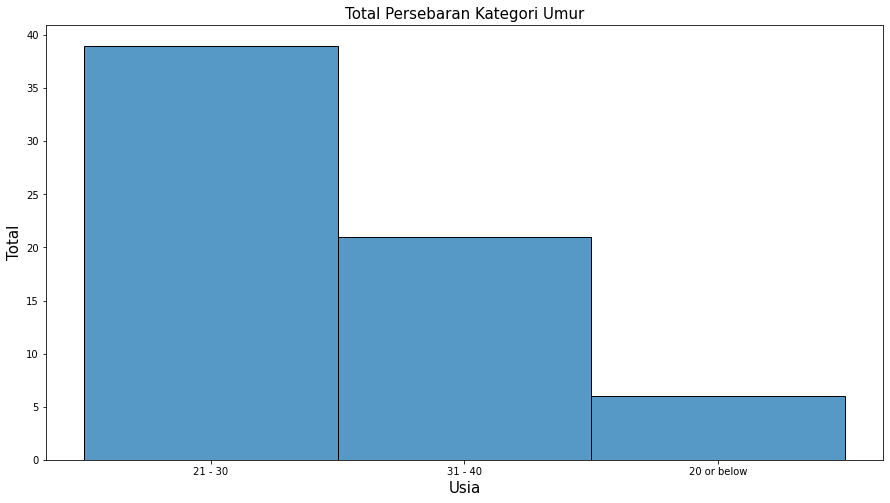

In [ ]:
plt.figure(figsize = (15,8))
sns.histplot(data = df, x = 'Age');
plt.title('Total Persebaran Kategori Umur', fontdict = {'fontsize':15});
plt.xlabel('Usia',fontdict={'fontsize': 15});
plt.ylabel('Total',fontdict={'fontsize': 15});

Dari visualisasi diatas, dapat dilihat bahwa kelompok usia 21-30 adalah rentang usia dengan persebaran paling besar di antara kelompok umur yang lainnya.

# Student

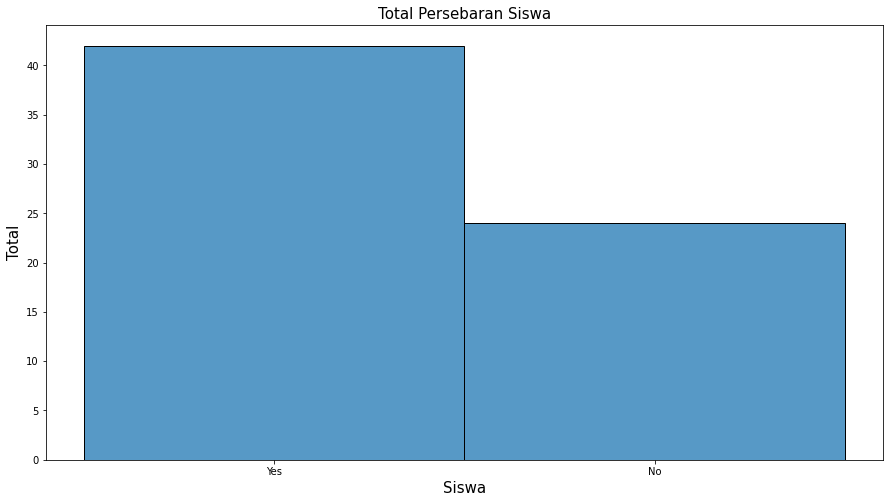

In [ ]:
plt.figure(figsize = (15,8))
sns.histplot(data = df, x = 'Student');
plt.title('Total Persebaran Siswa', fontdict = {'fontsize':15});
plt.xlabel('Siswa',fontdict={'fontsize': 15});
plt.ylabel('Total',fontdict={'fontsize': 15});

Berdasarkan hasil visualisasi diatas, dapat dilihat bahwa populasi siswa lebih banyak dibandingkan dengan yang bukan siswa.

## Marital

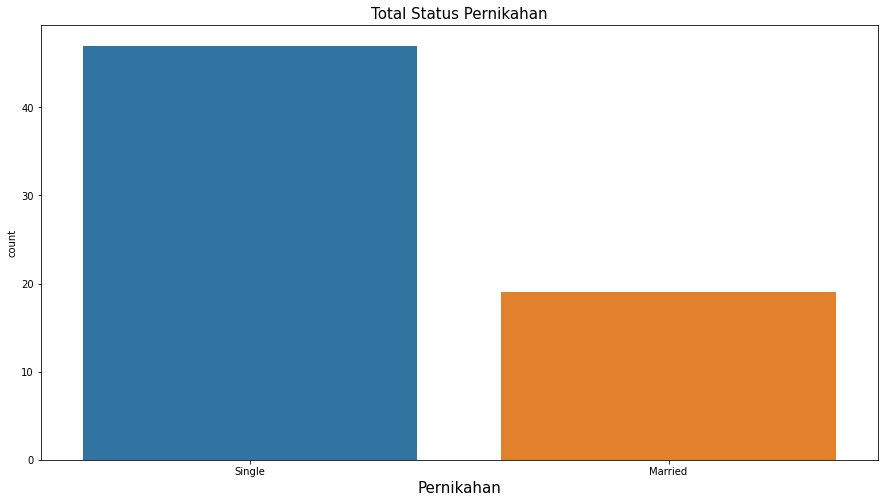

In [ ]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'Marital', data = df);
plt.title('Total Status Pernikahan',fontdict = {'fontsize':15});
plt.xlabel('Pernikahan',fontdict={'fontsize': 15});

Dari visualisasi diatas, dapat dilihat bahwa lebih banyak individu yang belum menikah dibandingkan dengan yang telah menikah.

### Marital by Gender

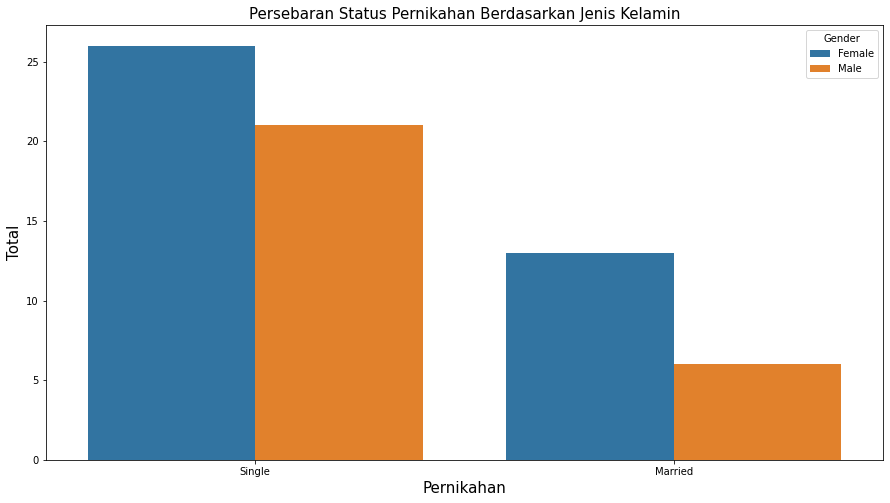

In [ ]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'Marital', data = df, hue = 'Gender');
plt.title('Persebaran Status Pernikahan Berdasarkan Jenis Kelamin', fontdict = {'fontsize':15})
plt.xlabel('Pernikahan',fontdict={'fontsize': 15});
plt.ylabel('Total',fontdict={'fontsize': 15});

Melanjutkan visualisasi di atas, sekarang kita melakukan visualisasi status pernikahan berdasarkan jenis kelamin. Berdasarkan hasil visualisasi di atas, didapatkan bahwa untuk jenis kelamin wanita adalah yang terbanyak dibandingkan dengan laki-laki, baik yang belum maupun telah menikah.

### Marital By Age

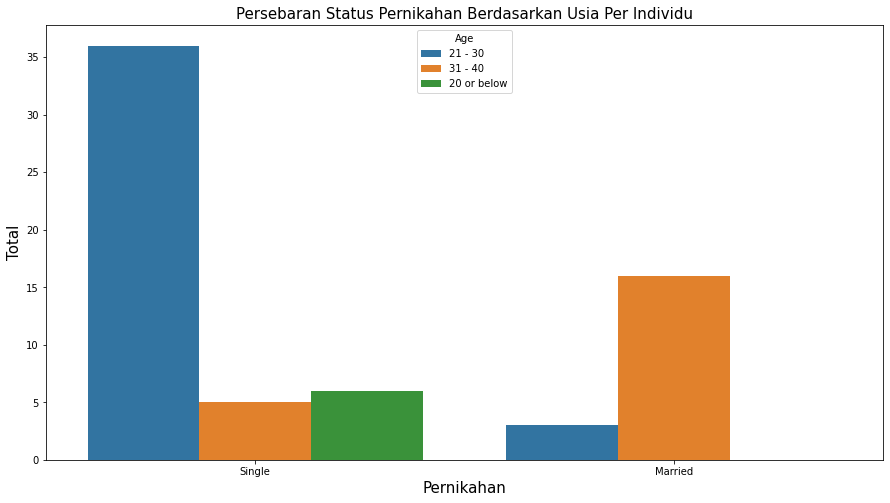

In [ ]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'Marital', data = df, hue = 'Age');
plt.title('Persebaran Status Pernikahan Berdasarkan Usia Per Individu', fontdict = {'fontsize':15});
plt.xlabel('Pernikahan',fontdict = {'fontsize':15});
plt.ylabel('Total',fontdict = {'fontsize':15});

Melanjutkan visualisasi di atas, sekarang kita melakukan visualisasi status pernikahan berdasarkan kelompok usia. Berdasarkan hasil visualisasi di atas, didapatkan beberapa hal sebagai berikut:

1. Kelompok usia 21-30 adalah kelompok usia terbanyak yang memiliki status belum menikah paling banyak. Sementara untuk kelompok usia 31 - 40 adalah kelompok usia yang memiliki status belum menikah terkecil.

2. Tidak ada individu pada kelompok usia 20 atau ke bawah yang telah menikah dan individu yang telah menikah paling banyak terdapat pada kelompok usia 31 - 40.

# Cek Korelasi

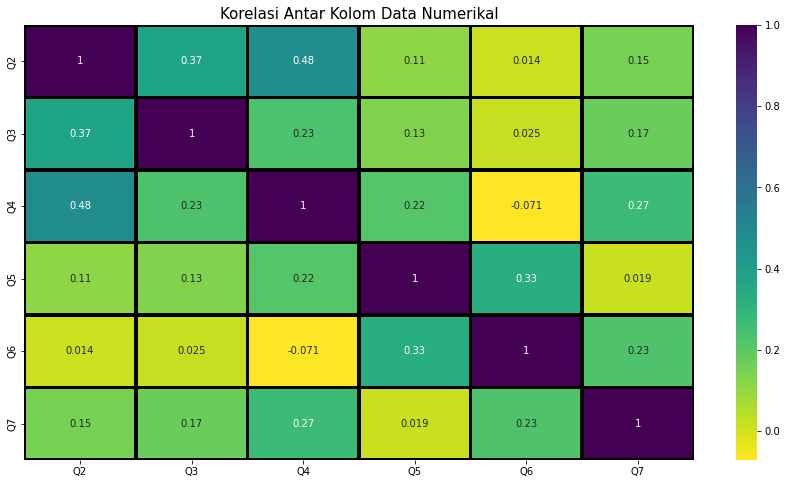

In [ ]:
plt.figure(figsize=(15,8));
sns.heatmap(df.corr(), cmap = 'viridis_r',annot = True,linecolor='black',linewidths=2.5);
plt.title('Korelasi Antar Kolom Data Numerikal', fontdict = {'fontsize':15});

# Data Pre-processing


## Kolom Q1_proc

Pada tahap ini, kolom Q1 akan dilakukan transformasi menjadi bentuk numerikal. Hal ini bertujuan dalam pembuatan kolom Total_Points nantinya.

In [ ]:
def maritals(marital):
  if marital == 'Less than 1 hours per day':
    return 1
  elif marital == 'Less than 2 hours per day':
    return 2
  elif marital == 'Less than 3 hours per day':
    return 3
  elif marital == 'Less than 4 hours per day':
    return 4
  elif marital == '4 hours and above per day':
    return 5
  else :
    return marital

In [ ]:
# Apply ke kolom Q1
df['Q1_proc'] = df['Q1'].apply(maritals)

In [ ]:
# Cek Data
df.head(25)

,Timestamp,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q1_proc
0,12/12/2019 2:06,Female,Yes,21 - 30,Single,Less than 4 hours per day,3,3,3,3,4,1,4
1,12/12/2019 21:41,Male,Yes,21 - 30,Single,Less than 2 hours per day,3,3,2,2,4,4,2
2,12/12/2019 21:42,Female,Yes,21 - 30,Single,4 hours and above per day,1,5,2,4,5,4,5
3,12/12/2019 21:43,Female,Yes,21 - 30,Single,Less than 1 hours per day,4,4,3,3,3,1,1
4,12/12/2019 21:43,Male,Yes,21 - 30,Single,Less than 1 hours per day,3,5,2,3,4,4,1
5,12/12/2019 21:47,Female,Yes,21 - 30,Single,Less than 2 hours per day,2,5,2,3,3,2,2
6,12/12/2019 21:52,Female,Yes,31 - 40,Married,Less than 2 hours per day,2,4,3,3,2,1,2
7,12/12/2019 22:38,Female,Yes,21 - 30,Single,4 hours and above per day,4,4,3,5,5,3,5
8,12/13/2019 7:19:36,Female,Yes,21 - 30,Single,4 hours and above per day,5,4,3,4,4,4,5
9,12/13/2019 12:10:15,Male,Yes,21 - 30,Single,4 hours and above per day,2,5,3,2,5,2,5


## Kolom Points

In [ ]:
df['Total_Points'] = df['Q1_proc'] + df['Q2'] + df['Q3'] + df['Q4'] + df['Q5'] + df['Q6'] + df['Q7']

Setelah itu, urutkan data berdasarkan kolom Total_Points secara berurutan dari yang terkecil hingga terbesar.

In [ ]:
df = df.sort_values(by='Total_Points',ascending=True).reset_index().drop('index',axis=1)

Sekarang periksa tampilan data terbaru.

In [ ]:
df.head()

,Timestamp,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q1_proc,Total_Points
0,12/13/2019 8:43:19,Female,No,31 - 40,Married,Less than 1 hours per day,2,2,2,3,3,2,1,15
1,12/12/2019 21:52,Female,Yes,31 - 40,Married,Less than 2 hours per day,2,4,3,3,2,1,2,17
2,1/1/2020 16:15,Female,Yes,21 - 30,Married,Less than 1 hours per day,2,2,2,2,4,5,1,18
3,12/31/2019 21:23:06,Female,Yes,21 - 30,Single,4 hours and above per day,1,1,1,4,5,1,5,18
4,12/14/2019 21:47:44,Male,No,21 - 30,Single,Less than 2 hours per day,3,4,3,2,2,2,2,18


In [ ]:
#pd.set_option('display.max_rows',None)

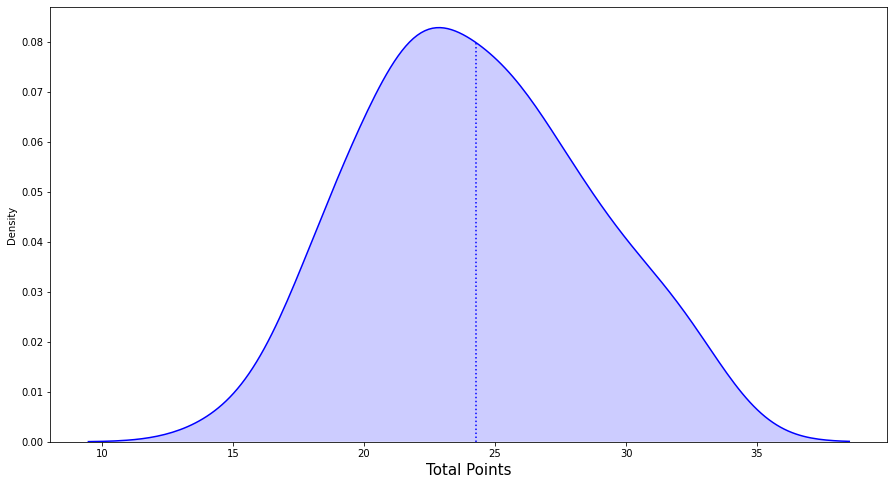

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(x = 'Total_Points', data = df, shade=False, color='blue')
kdeline = ax.lines[0]
mean = df['Total_Points'].mean()
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)
ax.vlines(mean, 0, height, color='blue', ls=':')
ax.fill_between(xs, 0, ys, facecolor='blue', alpha=0.2)
plt.xlabel('Total Points',fontdict = {'fontsize':15})
plt.show()

## None, Mild dan High

Total_Points yang telah didapatkan kemudian perlu diubah ke dalam bentuk kategori social anxiety untuk lebih mudah dimengerti.

In [ ]:
print(df['Total_Points'].min())
print(df['Total_Points'].mean())
print(df['Total_Points'].max())

15
24.257575757575758
33


In [ ]:
list(df['Total_Points'].unique())

[15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

Terdapat 18 titk data Total_Points yang unik. Dari sini, akan ditentukan kategori dengan kriteria sebagai berikut.

1. 15 - 21 : None Anxiety (tidak ada kecemasan)
2. 22 - 27 : Mild Anxiety (kecemasan ringan)
3. 28 - 33 : High Anxiety (kecemasan tinggi)

In [ ]:
def anxiety(score):
  if score in range(15,22):
    return 'None'
  elif score in range(22,28):
    return 'Mild'
  elif score in range(28,34):
    return 'High'

def anxiety_num(score): # akan berguna pada tahap modelling data nanti
  if score in range(15,22):
    return 0
  elif score in range(22,28):
    return 1
  elif score in range(28,34):
    return 2

In [ ]:
df.loc[:,'Anxiety'] = df['Total_Points'].apply(lambda x: anxiety(x))
df.loc[:,'Anxiety_num'] = df['Total_Points'].apply(lambda x: anxiety_num(x))

In [ ]:
# Cek Tampilan Terbaru
df

,Timestamp,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q1_proc,Total_Points,Anxiety,Anxiety_num
0,12/13/2019 8:43:19,Female,No,31 - 40,Married,Less than 1 hours per day,2,2,2,3,3,2,1,15,None,0
1,12/12/2019 21:52,Female,Yes,31 - 40,Married,Less than 2 hours per day,2,4,3,3,2,1,2,17,None,0
2,1/1/2020 16:15,Female,Yes,21 - 30,Married,Less than 1 hours per day,2,2,2,2,4,5,1,18,None,0
3,12/31/2019 21:23:06,Female,Yes,21 - 30,Single,4 hours and above per day,1,1,1,4,5,1,5,18,None,0
4,12/14/2019 21:47:44,Male,No,21 - 30,Single,Less than 2 hours per day,3,4,3,2,2,2,2,18,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,12/19/2019 14:01:37,Female,Yes,21 - 30,Single,4 hours and above per day,3,5,5,5,4,4,5,31,High,2
62,12/12/2019 22:36,Male,No,21 - 30,Single,4 hours and above per day,5,5,5,4,4,4,5,32,High,2
63,12/20/2019 22:35:50,Female,Yes,20 or below,Single,4 hours and above per day,4,4,4,5,5,5,5,32,High,2
64,12/22/2019 15:43:22,Female,No,21 - 30,Married,4 hours and above per day,5,5,5,5,5,3,5,33,High,2


# Visualisasi Kolom Q1_proc dan Anxiety

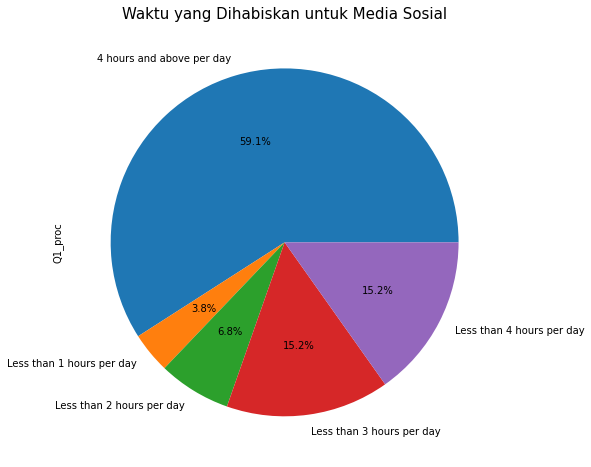

In [ ]:
data = df.groupby("Q1")["Q1_proc"].sum()
plt.figure(figsize=(15,8))
data.plot.pie(autopct="%.1f%%");
plt.title('Waktu yang Dihabiskan untuk Media Sosial', fontdict = {'fontsize':15});

Berdasarkan hasil visualisasi diatas, kita dapat melihat bahwa populasi terbanyak adalah kelompok individu yang menghabiskan waktu di sosial media selama 4 jam atau lebih. 

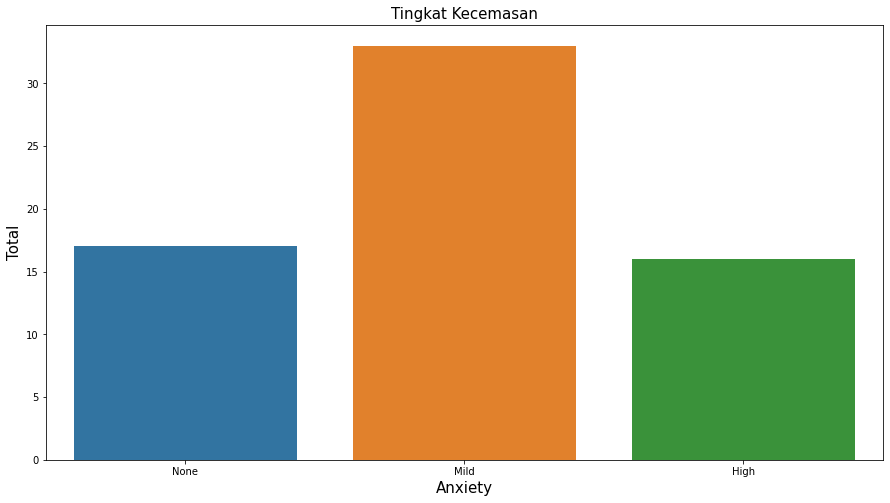

In [ ]:
plt.figure(figsize = (15,8))
sns.countplot(data = df, x = 'Anxiety');
plt.title('Tingkat Kecemasan', fontdict = {'fontsize':15});
plt.xlabel('Anxiety',fontdict={'fontsize': 15});
plt.ylabel('Total',fontdict={'fontsize': 15});

Berdasarkan hasil visualisasi di atas, didapatkan bahwa terdapat paling banyak individu dengan tingkat kecemasan yang ringan.

# Cek Outlier

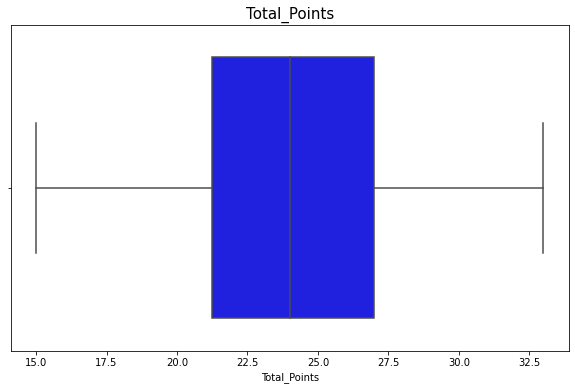

In [ ]:
plt.figure(figsize=(10,6));
sns.boxplot(x='Total_Points', data = df, color = 'blue')
plt.title('Total_Points',fontdict = {'fontsize':15});

# Data Preparation

## Cek Keunikan Data

In [ ]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df['Age'].unique()

array(['31 - 40', '21 - 30', '20 or below'], dtype=object)

In [ ]:
df['Student'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['Marital'].unique()

array(['Married', 'Single'], dtype=object)

In [ ]:
display(df['Q1'].unique())
display(df['Q2'].unique())
display(df['Q3'].unique())
display(df['Q4'].unique())
display(df['Q5'].unique())
display(df['Q6'].unique())
display(df['Q7'].unique())

array(['Less than 1 hours per day', 'Less than 2 hours per day',
       '4 hours and above per day', 'Less than 3 hours per day',
       'Less than 4 hours per day'], dtype=object)

array([2, 1, 3, 4, 5])

array([2, 4, 1, 5, 3])

array([2, 3, 1, 5, 4])

array([3, 2, 4, 5, 1])

array([3, 2, 4, 5, 1])

array([2, 1, 5, 4, 3])

In [ ]:
df['Student'].unique()

array(['No', 'Yes'], dtype=object)

## Transformasi Data


In [ ]:
df.head(1)

,Timestamp,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q1_proc,Total_Points,Anxiety,Anxiety_num
0,12/13/2019 8:43:19,Female,No,31 - 40,Married,Less than 1 hours per day,2,2,2,3,3,2,1,15,None,0


In [ ]:
def gen(gen):
  if gen == 'Male':
    return 0
  else :
    return 1

def stud(student):
  if student == 'No':
    return 0
  else :
    return 1

def age(age):
  if age == '20 or below':
    return 0
  elif age == '21-30':
    return 1
  else :
    return 2

def mar(marital):
  if marital == 'Single':
    return 0
  else :
    return 1

In [ ]:
df['gen_num'] = df.Gender.apply(gen)
df['student_num'] = df.Student.apply(stud)
df['age_num'] = df.Age.apply(age)
df['marital_num'] = df.Marital.apply(mar)

In [ ]:
df

,Timestamp,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q1_proc,Total_Points,Anxiety,Anxiety_num,gen_num,student_num,age_num,marital_num
0,12/13/2019 8:43:19,Female,No,31 - 40,Married,Less than 1 hours per day,2,2,2,3,3,2,1,15,None,0,1,0,2,1
1,12/12/2019 21:52,Female,Yes,31 - 40,Married,Less than 2 hours per day,2,4,3,3,2,1,2,17,None,0,1,1,2,1
2,1/1/2020 16:15,Female,Yes,21 - 30,Married,Less than 1 hours per day,2,2,2,2,4,5,1,18,None,0,1,1,2,1
3,12/31/2019 21:23:06,Female,Yes,21 - 30,Single,4 hours and above per day,1,1,1,4,5,1,5,18,None,0,1,1,2,0
4,12/14/2019 21:47:44,Male,No,21 - 30,Single,Less than 2 hours per day,3,4,3,2,2,2,2,18,None,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,12/19/2019 14:01:37,Female,Yes,21 - 30,Single,4 hours and above per day,3,5,5,5,4,4,5,31,High,2,1,1,2,0
62,12/12/2019 22:36,Male,No,21 - 30,Single,4 hours and above per day,5,5,5,4,4,4,5,32,High,2,0,0,2,0
63,12/20/2019 22:35:50,Female,Yes,20 or below,Single,4 hours and above per day,4,4,4,5,5,5,5,32,High,2,1,1,0,0
64,12/22/2019 15:43:22,Female,No,21 - 30,Married,4 hours and above per day,5,5,5,5,5,3,5,33,High,2,1,0,2,1


## Cek Korelasi

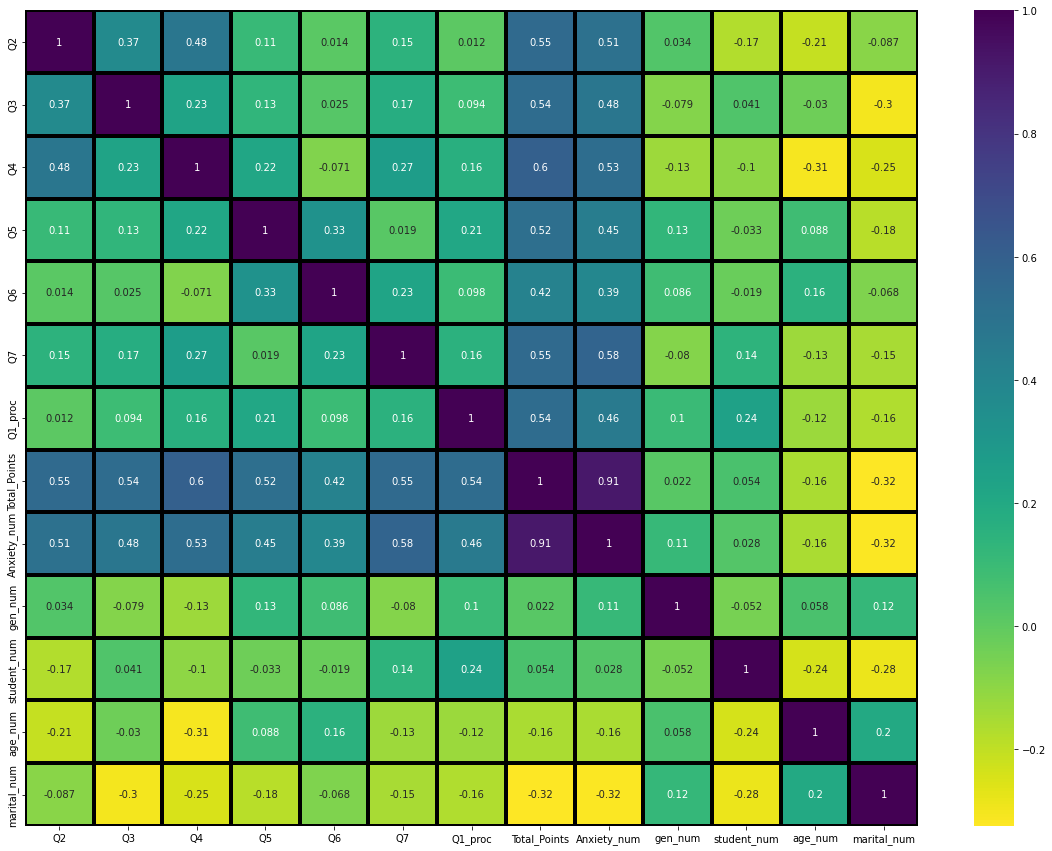

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap='viridis_r', annot = True, linecolor = 'black', linewidth = 3);

In [ ]:
df.corr()['Anxiety_num'].sort_values(ascending=False)

Anxiety_num     1.000000
Total_Points    0.914993
Q7              0.578509
Q4              0.529598
Q2              0.512363
Q3              0.477913
Q1_proc         0.461668
Q5              0.445336
Q6              0.385474
gen_num         0.112941
student_num     0.028352
age_num        -0.155883
marital_num    -0.317723
Name: Anxiety_num, dtype: float64

Berdasarkan korelasi terhadap kolom Anxiety di atas, dapat dilihat bahwa kolom Q1,Q2,Q3,Q4,Q5,Q6,Q7, dan Total_Points memiliki korelasi yang cukup tinggi terhadap kolom Anxiety_num. Berbeda dengan kolom gen_num, student_num, age_num dan marital_num, yang dimana keempat kolom tersebut memiliki relasi yang rendah terhadap kolom Anxiety_num.

## Subset Data

Disini, kolom-kolom yang memiliki korelasi tinggi terhadap Anxiety_num akan diambil sebagai input untuk model nanti. Oleh karena itu, kolom-kolom tersebut akan diambil dan dimasukkan ke dataframe baru.

In [ ]:
data_processed = df[['Q1_proc','Q2','Q3','Q4','Q5','Q6','Q7','Total_Points','Anxiety_num']]
data_processed.columns = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Total_Points','Anxiety']
data_processed.head(10)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Total_Points,Anxiety
0,1,2,2,2,3,3,2,15,0
1,2,2,4,3,3,2,1,17,0
2,1,2,2,2,2,4,5,18,0
3,5,1,1,1,4,5,1,18,0
4,2,3,4,3,2,2,2,18,0
5,1,4,4,3,3,3,1,19,0
6,2,2,5,2,3,3,2,19,0
7,1,3,3,1,5,5,1,19,0
8,3,3,1,3,4,4,1,19,0
9,3,3,3,2,2,4,2,19,0


# Data Modelling

Pada kasus permamalan / pendeteksian ada atau tidaknya seseorang mengalami kecemasan, maka akan digunakan model/ algoritma klasifikasi.

Pada analisis ini, akan digunakan algoritma K - Nearest Neighbour dan Support Vector Machines untuk mampu meramal apakah suatu individu dapat dikatakan tidak memiliki kecemasan (0), memiliki kecemasan ringan (1) atau 
memiliki kecemasan yang tinggi (2).

## 1. Buat Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')

## 2. Train dan Test Split

In [ ]:
X = data_processed.drop('Anxiety',axis=1)
y = data_processed[['Anxiety']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(52, 8) (14, 8) (52, 1) (14, 1)


#KNN

## 3. Model Fitting

In [ ]:
knn.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

## 4. Klasifikasi Kecemasan

In [ ]:
y_pred = knn.predict(X_test)
y_pred

array([2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 0, 1, 1])

## 5. Confusion Matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[2, 0, 0],
       [0, 7, 0],
       [0, 0, 5]])

## 6. Nilai akurasi, presisi, f1-score dan recall

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



#SVM

## 3. Model Fitting

In [ ]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

## 4. Klasifikasi Kecemasan

In [ ]:
#Predict the response for test dataset
y_pred2 = clf.predict(X_test)
y_pred2

array([2, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 1, 1])

## 5. Confusion Matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[2, 0, 0],
       [0, 7, 0],
       [0, 0, 5]])

## 6. Nilai akurasi, presisi, f1-score dan recall

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



#K-Fold Cross Validation

## Menghitung akurasi dengan k = 10

In [222]:
X = data_processed.drop('Anxiety',axis=1)
y = data_processed[['Anxiety']]

cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.936 (0.079)


## Melihat Akurasi ideal dan juga Akurasi dari k = 5 hingga k = 10

Ideal: 0.939
> folds=5, accuracy=0.801 (0.231,1.000)
> folds=6, accuracy=0.848 (0.273,1.000)
> folds=7, accuracy=0.890 (0.444,1.000)
> folds=8, accuracy=0.877 (0.625,1.000)
> folds=9, accuracy=0.923 (0.571,1.000)
> folds=10, accuracy=0.936 (0.833,1.000)


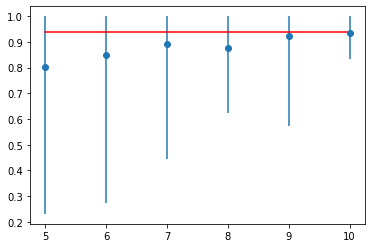

In [221]:
# create the dataset
def get_dataset(n_samples=100):
  X = data_processed.drop('Anxiety',axis=1)
  y = data_processed[['Anxiety']]
  return X, y
 
# retrieve the model to be evaluate
def get_model():
	model = LogisticRegression()
	return model
 
# evaluate the model using a given test condition
def evaluate_model(cv):
	# get the dataset
	X, y = get_dataset()
	# get the model
	model = get_model()
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# return scores
	return mean(scores), scores.min(), scores.max()
 
# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(5,11)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
	# define the test condition
	cv = KFold(n_splits=k, shuffle=True, random_state=1)
	# evaluate k value
	k_mean, k_min, k_max = evaluate_model(cv)
	# report performance
	print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
	# store mean accuracy
	means.append(k_mean)
	# store min and max relative to the mean
	mins.append(k_mean - k_min)
	maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()

# Download CSV

In [223]:
from google.colab import files
y_test.to_csv ('pred.csv', index = False, header=True)